In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr, kendalltau

In [5]:
'''
모든 지표는 OCSVM / OCNN / Anogan / our 순
'''

auc_list = [0.8161, 0.7155, 0.8245, 0.9265]

pear_list = []
spear_list = []
kendal_list = []

nm_mmse = np.loadtxt('dataset/dongdong2/normal/normal_1/MMSE_1.txt')
ab_mmse = np.loadtxt('dataset/dongdong2/abnormal/abnormal_0/MMSE_0.txt')
print(np.shape(nm_mmse), np.shape(ab_mmse))

mmse_list = np.append(nm_mmse, ab_mmse)

(25,) (31,)


pearson's : 0.11846474604279547 0.009391666341287783
spearman's : 0.10699808154309659 0.013865340805015945
kendall : 0.047721247824340625 0.02032377124227769


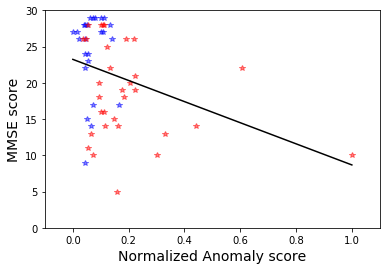

pearson's : 0.031086088169299957 0.19365116449975225
spearman's : 0.0013513251637463906 0.7879482454062554
kendall : 0.000678805730352122 0.7819836137683853


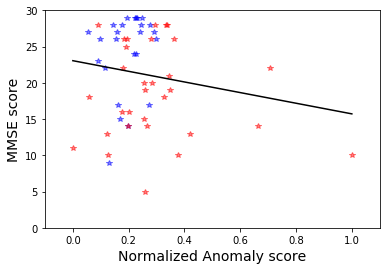

pearson's : 0.07213131162686615 0.04534696367621508
spearman's : 0.02825640503179728 0.21557478350390946
kendall : 0.012746463158834294 0.2304560599361133


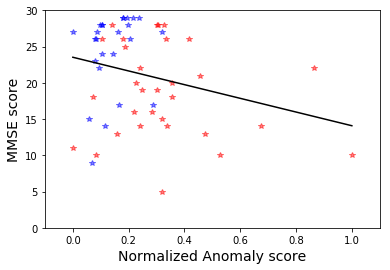

pearson's : 0.14287961046200306 0.00407561808395113
spearman's : 0.13422643388743616 0.005484712848897599
kendall : 0.06478377292810283 0.0068615959241658565


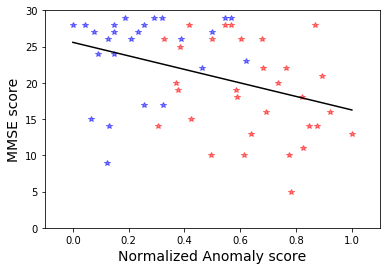

In [13]:
for k in range(1,5):
    score_list = np.load('score_list%d.npy'%k)
    plt.plot(score_list[:25], mmse_list[:25], 'b*', alpha=0.5)
    plt.plot(score_list[25:], mmse_list[25:], 'r*', alpha=0.5)

    line_fitter = LinearRegression()
    line_fitter.fit(score_list.reshape(-1,1), mmse_list)
    R_, p = pearsonr(score_list, mmse_list)
    pear_list.append(R_**2)
    print("pearson's :", R_**2, p)
    R_, p = spearmanr(score_list, mmse_list)
    spear_list.append(R_**2)
    print("spearman's :", R_**2, p)
    tau_, p = kendalltau(score_list, mmse_list)
    kendal_list.append(tau_**2)
    print("kendall :", tau_**2, p)
    rsqr = R_**2

    a = np.min(score_list)
    b = np.max(score_list)
    plt.plot([a,b], line_fitter.predict(np.reshape([a,b],(-1,1))), 'k')
    plt.xlabel('Normalized Anomaly score', fontsize=14)
    plt.ylabel('MMSE score', fontsize=14)
    plt.ylim(0,30)
    plt.xlim(-0.1,1.1)
    # plt.title('Anomaly score distribution (aug_spec & Shift)', fontsize=14)
    # plt.savefig('%s_img/mmse_plot_trial%d.png'%(method_name, trial_num))
    plt.show()

In [43]:
print(auc_list)
print(pear_list)
print(spear_list)
print(kendal_list)
perform_arr = pd.DataFrame(list(zip(auc_list,pear_list,spear_list,kendal_list)),
                          columns = ['AUC', 'Pear', 'Spear', 'Kendal'],
                          index = ['SVM','NN','ANO','OUR'])
print(perform_arr)

sns.barplot(data = perform_arr, x=['AUC', 'Pear', 'Spear', 'Kendal'])

[0.8161, 0.7155, 0.8245, 0.9265]
[0.11846474604279547, 0.031086088169299957, 0.07213131162686615, 0.14287961046200306]
[0.10699808154309659, 0.0013513251637463906, 0.02825640503179728, 0.13422643388743616]
[0.047721247824340625, 0.000678805730352122, 0.012746463158834294, 0.06478377292810283]
        AUC      Pear     Spear    Kendal
SVM  0.8161  0.118465  0.106998  0.047721
NN   0.7155  0.031086  0.001351  0.000679
ANO  0.8245  0.072131  0.028256  0.012746
OUR  0.9265  0.142880  0.134226  0.064784


TypeError: bar() missing 1 required positional argument: 'height'